In [28]:
# # -*- coding: utf-8 -*-
# """
# Created on Sat Nov 16 19:34:37 2019

# @author: LWQIN
# """

In [58]:
#import os
#os.chdir('C:/Users/tan.joryi/Desktop/p/data analytics/project')

In [67]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [68]:
#load data
df = pd.read_csv('kc_house_data.csv')

In [69]:
"""
###DATA PREPROCESSING
"""
#Check the types of all the column
df.shape #21613 rows, 21 columns
df.dtypes #all numeric


id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [70]:
#check for missing values
df.isna().sum() #no missing values

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [71]:
#Convert zipcode into categorical as it represent location not numeric values
#Convert waterfront to categorical as well (according to data table)
df['zipcode'] = df['zipcode'].astype('category',copy=False)
df['waterfront'] = df['waterfront'].astype('category',copy=False)
df.dtypes

id                  int64
date               object
price             float64
bedrooms            int64
bathrooms         float64
sqft_living         int64
sqft_lot            int64
floors            float64
waterfront       category
view                int64
condition           int64
grade               int64
sqft_above          int64
sqft_basement       int64
yr_built            int64
yr_renovated        int64
zipcode          category
lat               float64
long              float64
sqft_living15       int64
sqft_lot15          int64
dtype: object

In [74]:
#removing id as it does not contribute to the analysis
df.drop(columns = 'id', inplace = True)
df.shape

(21613, 20)

In [75]:
#the date column is not formatted correctly e.g.20141013T000000
#to extract only the year from the date
for i in range(0,len(df)): #require quite some time to loop through
    df.iloc[i,0] = df.iloc[i,0][0:4] 

In [37]:
#convert date from string to int
df['date'] = df['date'].astype('int64', copy=False)
df.dtypes

date                int64
price             float64
bedrooms            int64
bathrooms         float64
sqft_living         int64
sqft_lot            int64
floors            float64
waterfront       category
view                int64
condition           int64
grade               int64
sqft_above          int64
sqft_basement       int64
yr_built            int64
yr_renovated        int64
zipcode          category
lat               float64
long              float64
sqft_living15       int64
sqft_lot15          int64
dtype: object

In [77]:
# '''
# """NEW"""
# #compute age of house from year of data obtained and year built/renovated
# df['age_since_built'] = df['date'] - df['yr_built']

# df['age_since_reno'] = ""

# for i in range(0,len(df)):
#     if df['yr_renovated'][i] != 0:
#         df['age_since_reno'][i] = df['date'][i] - df['yr_renovated'][i]
#     else:
#         df['age_since_reno'][i] = df['age_since_built'][i]

# df['age_since_reno'] = df['age_since_reno'].astype('int64', copy=False)
# '''


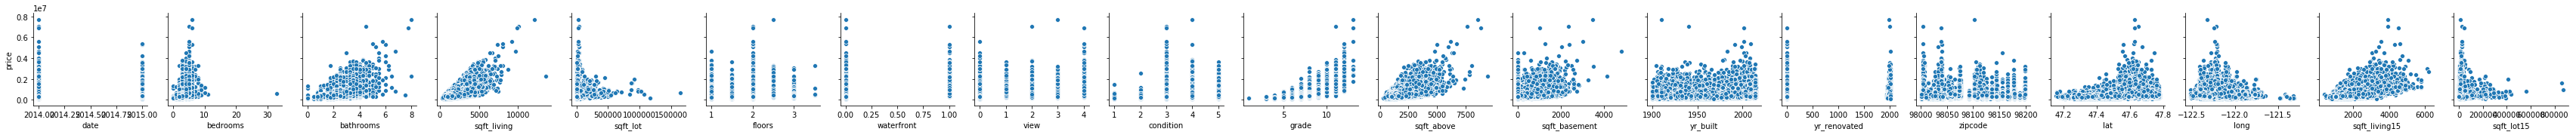

In [39]:
"""
###EXPLORATORY DATA ANALYSIS
"""
#scatter plot of all variables against price
columns = df.columns.values #define column names
columns = np.delete(columns,1) #removed column of price

pp = sns.pairplot(data=df,
                  y_vars=['price'],
                  x_vars=columns
                  )

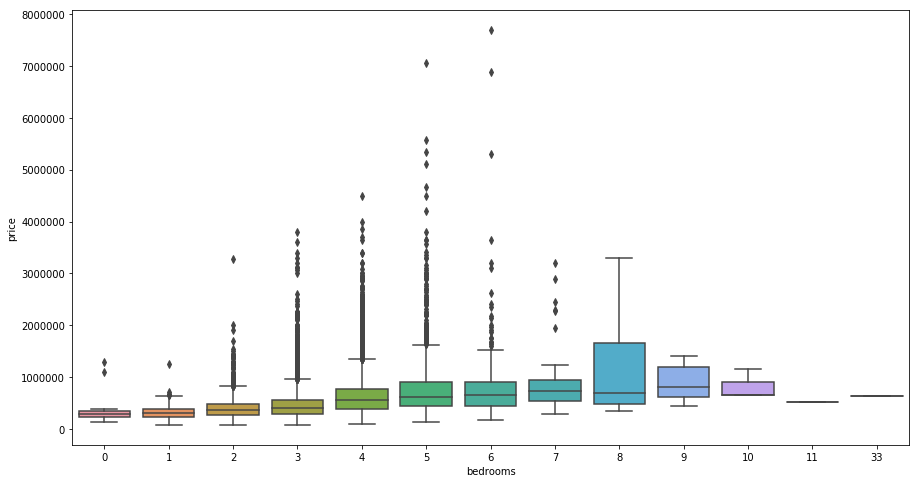

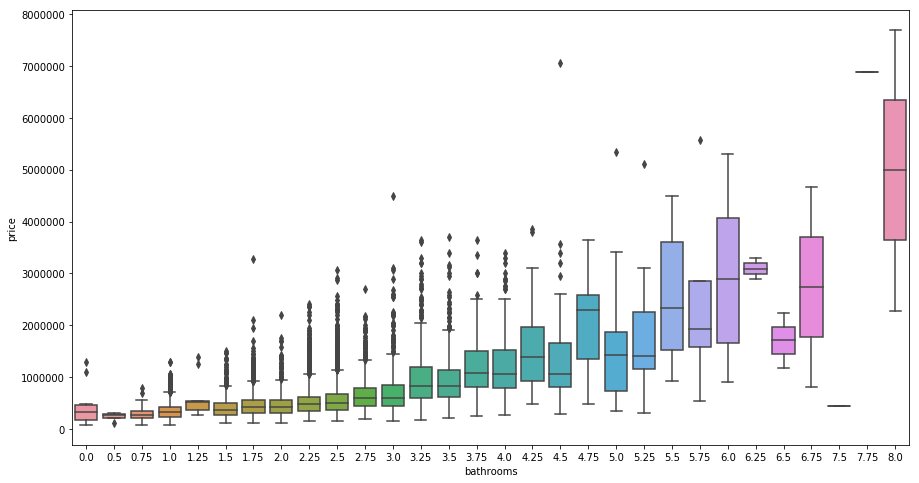

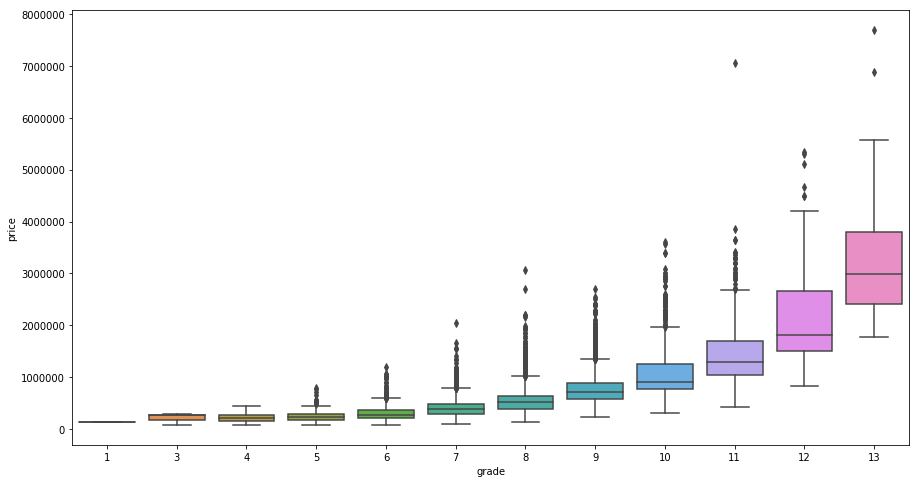

In [40]:
#boxplot
plt.figure(figsize=(15,8))
sns.boxplot(df['bedrooms'],df['price'])

plt.figure(figsize=(15,8))
sns.boxplot(df['bathrooms'],df['price'])

plt.figure(figsize=(15,8))
sns.boxplot(df['grade'],df['price'])

In [86]:
#correlation between all numeric variables
corr_matrix = df.corr()

In [87]:
# '''
# """NEW"""
# fig, ax = plt.subplots(figsize=(20,16))
# hm_all = sns.heatmap(corr_matrix, annot=True, linewidths=0.5, ax=ax)
# bottom, top = hm_all.get_ylim()
# hm_all.set_ylim(bottom+0.5,top-0.5)
# '''


In [92]:
#Filter only variables which has correlation > 0.5 with price (target)
filter_corr_matrix = corr_matrix.loc['price',][corr_matrix.loc['price',] > 0.5]
filter_corr_matrix.pop('price') #removing price
highly_correlated_variables = filter_corr_matrix.index.values

(5.5, -0.5)

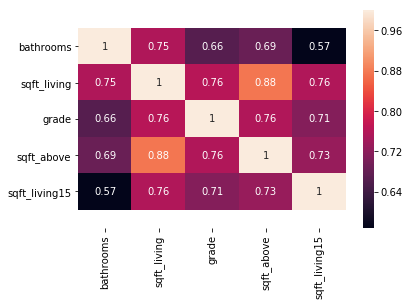

In [100]:
# '''
# """NEW"""
#remove highly correlated independent variables
highly_correlated_variables_corr = df[highly_correlated_variables].corr()
hm = sns.heatmap(highly_correlated_variables_corr,annot=True) #perhaps can try using all 5 variables
bottom_, top_ = hm.get_ylim()
hm.set_ylim(bottom_+0.5,top_-0.5)

# '''

# """
# ###PRE-ANALYSIS - TRANSFORMATION
# """


Text(0,0.5,'Frequency')

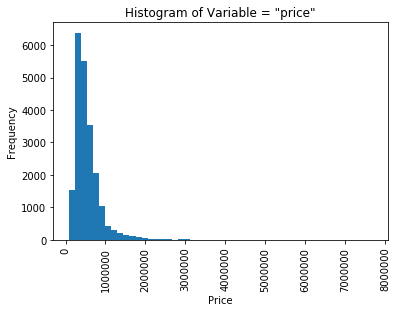

In [103]:
#histogram of price
plt.hist(df['price'],bins =50) #not normally distributed, right skewed
plt.xticks(rotation=90)
plt.title('Histogram of Variable = "price"')
plt.xlabel('Price')
plt.ylabel('Frequency')


Text(0,0.5,'Frequency')

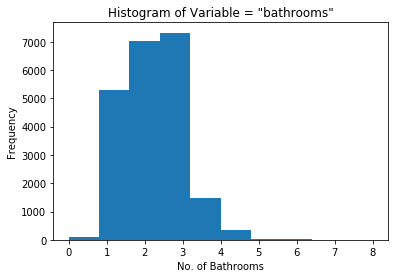

In [97]:
#check distribution of each selected variable
plt.hist(df['bathrooms']) #right skewed
plt.title('Histogram of Variable = "bathrooms"')
plt.xlabel('No. of Bathrooms')
plt.ylabel('Frequency')

Text(0,0.5,'Frequency')

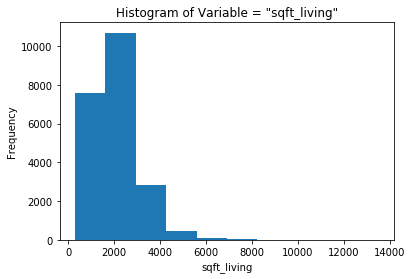

In [104]:
plt.hist(df['sqft_living']) #right skewed
plt.title('Histogram of Variable = "sqft_living"')
plt.xlabel('sqft_living')
plt.ylabel('Frequency')

Text(0,0.5,'Frequency')

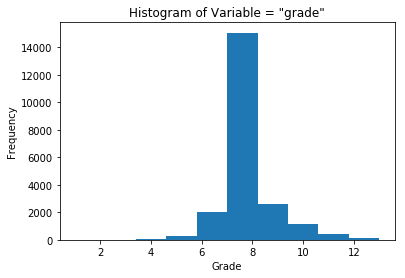

In [99]:
plt.hist(df['grade']) #left skewed
plt.title('Histogram of Variable = "grade"')
plt.xlabel('Grade')
plt.ylabel('Frequency')

Text(0,0.5,'Frequency')

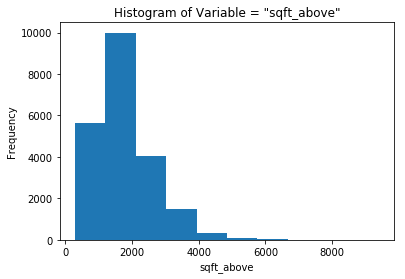

In [101]:
plt.hist(df['sqft_above']) #right skewed
plt.title('Histogram of Variable = "sqft_above"')
plt.xlabel('sqft_above')
plt.ylabel('Frequency')

Text(0,0.5,'Frequency')

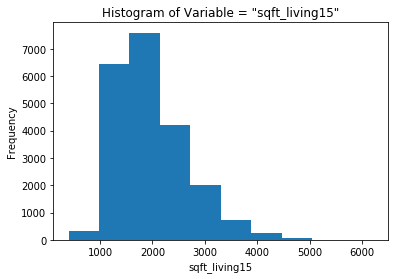

In [102]:
plt.hist(df['sqft_living15']) #right skewed
plt.title('Histogram of Variable = "sqft_living15"')
plt.xlabel('sqft_living15')
plt.ylabel('Frequency')

In [105]:
df[highly_correlated_variables]

,bathrooms,sqft_living,grade,sqft_above,sqft_living15
0,1.00,1180,7,1180,1340
1,2.25,2570,7,2170,1690
2,1.00,770,6,770,2720
3,3.00,1960,7,1050,1360
4,2.00,1680,8,1680,1800
5,4.50,5420,11,3890,4760
6,2.25,1715,7,1715,2238
7,1.50,1060,7,1060,1650
8,1.00,1780,7,1050,1780
9,2.50,1890,7,1890,2390


C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-do

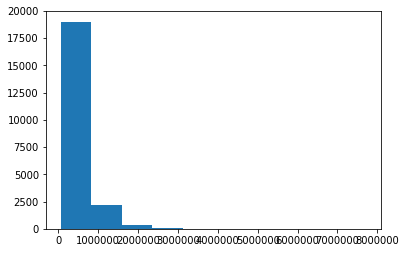

In [121]:
#prepare x and y dataset
#transform x and y to make them normally distirbuted for better accuracy
X = df[highly_correlated_variables]

# transform X['bathrooms'] by log(1+x) for right skewed data
X['bathrooms'] = np.log1p(X['bathrooms']) 

# transform X['sqft_living'] by log(1+x) for right skewed data
X['sqft_living'] = np.log1p(X['sqft_living']) 
 
# transform X['grade'] by multiplying to the power of 1.5 for right skewed data,
#can be also square or cube, but for this case, 1.5 works best
X['grade'] = X['grade']**1.5 

# transform X['sqft_above'] by log(1+x) for right skewed data
X['sqft_above'] = np.log1p(X['sqft_above']) 

# transform X['sqft_living15'] by square rooting for right skewed data, log(1+x) does not work for this variable
X['sqft_living15'] = np.sqrt(X['sqft_living15']) 

 # transform y by log(1+x) for right skewed data
y = df['price']
plt.hist(y)

y = np.log1p(y)

#reference for data transformation http://seismo.berkeley.edu/~kirchner/eps_120/Toolkits/Toolkit_03.pdf

In [122]:
# '''
# """NEW"""
# plt.hist(X['bathrooms']) #looks more normally distributed
# plt.title('Histogram of Transformed Variable = "bathrooms"')
# plt.xlabel('[Transformed] No. of Bathrooms')
# plt.ylabel('Frequency')

# plt.hist(X['sqft_living']) #looks more normally distributed
# plt.title('Histogram of Transformed Variable = "sqft_living"')
# plt.xlabel('[Transformed] sqft_living')
# plt.ylabel('Frequency')

# plt.hist(X['grade']) #looks more normally distributed
# plt.title('Histogram of Transformed Variable = "grade"')
# plt.xlabel('[Transformed] Grade')
# plt.ylabel('Frequency')

# plt.hist(X['sqft_above']) #looks more normally distributed
# plt.title('Histogram of Transformed Variable = "sqft_above"')
# plt.xlabel('[Transformed] sqft_above')
# plt.ylabel('Frequency')

# plt.hist(X['sqft_living15']) #looks more normally distributed
# plt.title('Histogram of Transformed Variable = "sqft_living15"')
# plt.xlabel('[Transformed] sqft_living15')
# plt.ylabel('Frequency')

# plt.hist(y) #looks more normally distributed
# plt.title('Histogram of Transformed Variable = "price"')
# plt.xlabel('Price')
# plt.ylabel('Frequency')
# '''

# '''
# """NEW"""
# """
# ###PREDICTIVE ANALYSIS - BEFORE FEATURE SELECTION
# """
# df2 = df.copy()

# #drop columns which do not contribute to predictive analysis
# df2.drop(columns=['date','yr_built','yr_renovated','lat','long'], inplace = True)

# #Explore each variable and carry out transformation
# plt.hist(df2['bedrooms'])
# plt.hist(np.log1p(df2['bedrooms']))

# df2['bedrooms'] = np.log1p(df2['bedrooms'])
# #---------------------
# plt.hist(df2['bathrooms'])
# plt.hist(np.log1p(df2['bathrooms']))

# df2['bathrooms'] = np.log1p(df2['bathrooms'])
# #---------------------
# plt.hist(df2['sqft_living'])
# plt.hist(np.log1p(df2['sqft_living']))

# df2['sqft_living'] = np.log1p(df2['sqft_living'])
# #---------------------
# plt.hist(df2['sqft_lot'])
# plt.hist(np.log1p(df2['sqft_lot']))

# df2['sqft_lot'] = np.log1p(df2['sqft_lot'])
# #---------------------
# plt.hist(df2['floors'])
# plt.hist(np.log1p(df2['floors']))

# df2['floors'] = np.log1p(df2['floors'])
# #---------------------
# plt.hist(df2['view'])
# plt.hist(np.log1p(df2['view']))

# df2['view'] = np.log1p(df2['view'])
# #---------------------
# plt.hist(df2['condition'])
# plt.hist(df2['condition']**1.5)

# df2['condition'] = df2['condition']**1.5
# #---------------------
# plt.hist(df2['grade'])
# plt.hist(df2['grade']**1.5)

# df2['grade'] = df2['grade']**1.5
# #---------------------
# plt.hist(df2['sqft_above'])
# plt.hist(np.log1p(df2['sqft_above']))

# df2['sqft_above'] = np.log1p(df2['sqft_above'])
# #---------------------
# plt.hist(df2['sqft_basement'])
# plt.hist(df2['sqft_basement']**(1/3))

# df2['sqft_basement'] = df2['sqft_basement']**(1/3)
# #---------------------
# plt.hist(df2['sqft_living15'])
# plt.hist(np.sqrt(df2['sqft_living15']))

# df2['sqft_living15'] = np.sqrt(df2['sqft_living15'])
# #---------------------
# plt.hist(df2['sqft_lot15'])
# plt.hist(np.log1p(df2['sqft_lot15']))

# df2['sqft_lot15'] = np.log1p(df2['sqft_lot15'])
# #---------------------
# plt.hist(df2['age_since_built'])
# plt.hist(np.sqrt(df2['age_since_built']))

# df2['age_since_built'] = np.sqrt(df2['age_since_built'])
# df2['age_since_built'].fillna(0, inplace=True)
# #---------------------
# plt.hist(df2['age_since_reno'])
# plt.hist(np.sqrt(df2['age_since_reno']))

# df2['age_since_reno'] = np.sqrt(df2['age_since_reno'])
# df2['age_since_reno'].fillna(0, inplace=True)
# #---------------------

# df2_with_dummy = pd.get_dummies(df2,drop_first=True)

# plt.hist(df2_with_dummy['price'])
# plt.hist(np.log1p(df2_with_dummy['price']))

# df2_y = df2_with_dummy['price']
# df2_y = np.log1p(df2_y)

# df2_with_dummy.drop(columns=['price'], inplace=True)

# df2_X_train, df2_X_test, df2_y_train, df2_y_test = train_test_split(df2_with_dummy, df2_y, test_size=0.3, random_state=101)

# #linear regression
# lm2 = LinearRegression()
# lm2.fit(df2_X_train,df2_y_train)
# lm2.intercept_
# lm2.score(df2_X_train,df2_y_train) #R2 score for training
# coeff_df2 = pd.DataFrame(lm2.coef_,df2_with_dummy.columns,columns=['Coefficient'])
# coeff_df2

# #Predict the house price and evaluate the model
# df2_predictions = lm2.predict(df2_X_test)
# df2_predictions = np.expm1(df2_predictions) #to inverse the log
# df2_y_test = np.expm1(df2_y_test)

# plt.scatter(df2_y_test,df2_predictions)
# plt.title('Scatter Plot of Actual vs Predicted Price for Model Trained Before Feature Selection')
# plt.xlabel('Actual Price')
# plt.ylabel('Predicted Price')

# #Evaluate the result
# #define a function for MAPE as there is no built-in function
# def mean_absolute_percentage_error(y_true, y_pred): 
#     y_true, y_pred = np.array(y_true), np.array(y_pred)
#     return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# print('MAE:', metrics.mean_absolute_error(df2_y_test, df2_predictions))
# print('MAPE:', mean_absolute_percentage_error(df2_y_test, df2_predictions))
# print('MSE:', metrics.mean_squared_error(df2_y_test, df2_predictions))
# print('RMSE:', np.sqrt(metrics.mean_squared_error(df2_y_test, df2_predictions)))
# print('R2:', metrics.r2_score(df2_y_test, df2_predictions))
# '''

# """
# ###PREDICTIVE ANALYSIS - AFTER FEATURE SELECTION
# """

In [123]:
#Adding categorical variables into X
X['zipcode'] = df['zipcode']
X['waterfront'] = df['waterfront']

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [129]:
#One hot encode categorical value 
X['zipcode'].value_counts()
X_with_dummy = pd.get_dummies(X,drop_first=False)

In [130]:
#Train test split
X_train, X_test, y_train, y_test = train_test_split(X_with_dummy, y, test_size=0.3, random_state=101)

In [133]:
#linear regression
lm = LinearRegression()
lm.fit(X_train,y_train)
lm.intercept_
lm.score(X_train,y_train) #R2 score for training
coeff_df = pd.DataFrame(lm.coef_,X_with_dummy.columns,columns=['Coefficient'])
coeff_df

,Coefficient
bathrooms,-1.633238e-02
sqft_living,4.053339e-01
grade,2.165861e-02
sqft_above,6.425091e-02
sqft_living15,9.783982e-03
zipcode_98001,-2.607658e+09
zipcode_98002,-2.607658e+09
zipcode_98003,-2.607658e+09
zipcode_98004,-2.607658e+09
zipcode_98005,-2.607658e+09


In [52]:
#Predict the house price and evaluate the model
predictions = lm.predict(X_test)
predictions = np.expm1(predictions) #to inverse the log
y_test = np.expm1(y_test)

In [ ]:
# '''
# """NEW"""
# plt.scatter(y_test,predictions)
# plt.title('Scatter Plot of Actual vs Predicted Price for Model Trained After Feature Selection')
# plt.xlabel('Actual Price')
# plt.ylabel('Predicted Price')
# '''

In [53]:
#Evaluate the result
#define a function for MAPE as there is no built-in function
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MAPE:', mean_absolute_percentage_error(y_test, predictions)) #14.77%
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('R2:', metrics.r2_score(y_test, predictions)) #0.87!

MAE: 78460.34772002984
MAPE: 14.770159878655734
MSE: 17850643962.91448
RMSE: 133606.30210777663
R2: 0.8727452756810556
